# 01.- Exploratory Data Analysis (EDA)

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import chi2_contingency

In [2]:
# Importing the dataset *'profiles.csv'*
profiles = pd.read_csv(r"C:\Users\ntama\Documentos\Data Science\Codecademy\projects\Data for dating app\profiles.csv")

#### Description of features:</br>

- body_type </br>
- diet</br>
- drinks</br>
- drugs</br>
- education</br>
- ethnicity</br>
- height</br>
- income</br>
- job</br>
- offspring</br>
- orientation</br>
- pets</br>
- religion</br>
- sex</br>
- sign</br>
- smokes</br>
- speaks</br>
- status</br>

And a set of open short-answer responses to :</br>

- essay0 - My self-summary</br>
- essay1 - What I’m doing with my life</br>
- essay2 - I’m really good at…</br>
- essay3 - The first thing people usually notice about me…</br>
- essay4 - Favorite books, movies, show, music, and food</br>
- essay5 - The six things I could never do without</br>
- essay6 - I spend a lot of time thinking about…</br>
- essay7 - On a typical Friday night I am…</br>
- essay8 - The most private thing I am willing to admit</br>
- essay9 - You should message me if…

In [3]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


We are not working with essay-type features in our project scope, for that reason, 'essay0' to 'essay9' will be removed from the dataset

In [4]:
for i in range(10):
    col = f'essay{i}'
    if col in profiles.columns:
        profiles.drop(columns=col, inplace=True)


### 02.- Checking missingness in the dataset

In [5]:
profiles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [6]:
for column in profiles.columns:
    print(f"Missing values for {column}:")
    missing = np.sum(profiles[column].isna())
    total = len(profiles)
    print(missing)
    print(f"{(round((missing / total),2))*100}%")

Missing values for age:
0
0.0%
Missing values for body_type:
5296
9.0%
Missing values for diet:
24395
41.0%
Missing values for drinks:
2985
5.0%
Missing values for drugs:
14080
23.0%
Missing values for education:
6628
11.0%
Missing values for ethnicity:
5680
9.0%
Missing values for height:
3
0.0%
Missing values for income:
0
0.0%
Missing values for job:
8198
14.000000000000002%
Missing values for last_online:
0
0.0%
Missing values for location:
0
0.0%
Missing values for offspring:
35561
59.0%
Missing values for orientation:
0
0.0%
Missing values for pets:
19921
33.0%
Missing values for religion:
20226
34.0%
Missing values for sex:
0
0.0%
Missing values for sign:
11056
18.0%
Missing values for smokes:
5512
9.0%
Missing values for speaks:
50
0.0%
Missing values for status:
0
0.0%


In [7]:
print(profiles.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')


### 03.- Description of main metrics for numerical values

In [8]:
print(profiles.describe())

                age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


### 04.- Univariate and bivariate analysis

#### 04.1 - Distribution of age among the dataset

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


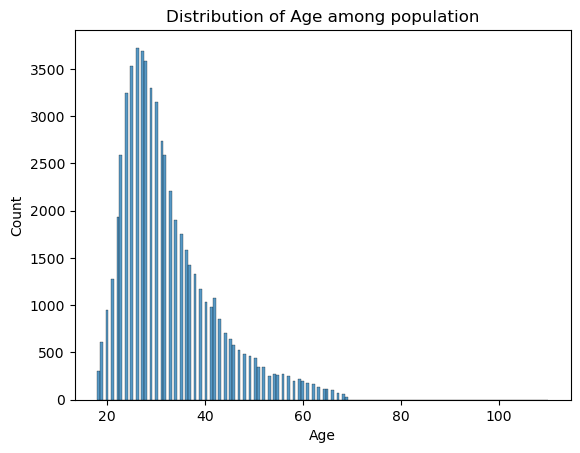

In [9]:
#plotting the distribution, age has no missing values
sns.histplot(data=profiles, x='age')
plt.xlabel('Age')
plt.title('Distribution of Age among population')
plt.show()


In [10]:
#Binning our data to check the counts in 10-year intervals
print('Table 1: Frequency table for age.')

age_list = list(range(0,120,5))
binned_age = pd.cut(profiles['age'], age_list, right=False)
print(binned_age.value_counts())

Table 1: Frequency table for age.
age
[25, 30)      17818
[30, 35)      12579
[20, 25)      10003
[35, 40)       7267
[40, 45)       4648
[45, 50)       2690
[50, 55)       1650
[55, 60)       1210
[15, 20)        920
[60, 65)        789
[65, 70)        370
[105, 110)        1
[110, 115)        1
[5, 10)           0
[70, 75)          0
[75, 80)          0
[80, 85)          0
[85, 90)          0
[90, 95)          0
[95, 100)         0
[100, 105)        0
[10, 15)          0
[0, 5)            0
Name: count, dtype: int64


There are two values with over 100 year-old

In [11]:
print(np.sum(profiles['age'] > 100))

2


In [12]:
#calculating proportions for top 3 age groups
age_counts = binned_age.value_counts().sort_index()

age_proportions = age_counts / age_counts.sum()

top_3_proportions = age_proportions.sort_values(ascending=False).head(3)

print(top_3_proportions)


age
[25, 30)    0.297234
[30, 35)    0.209839
[20, 25)    0.166867
Name: count, dtype: float64


##### Q2: Grouping age groups by their income

In [13]:
filtered = profiles[profiles['income'] > 0]
correlation = filtered['age'].corr(filtered['income'])
print(f"Correlation between age and income: {correlation:.3f}")

Correlation between age and income: -0.009


No correlation is observed between age and income

#### 04.2 - Distribution of height among the dataset

In [14]:
profiles['height'] = pd.to_numeric(profiles['height'])

There is an invalid object at position 36428 for the variable 'height'

In [15]:
print(profiles.iloc[36428]['height'])

nan


In [16]:
profiles['height'] = profiles['height'].fillna(profiles['height'].mean())

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


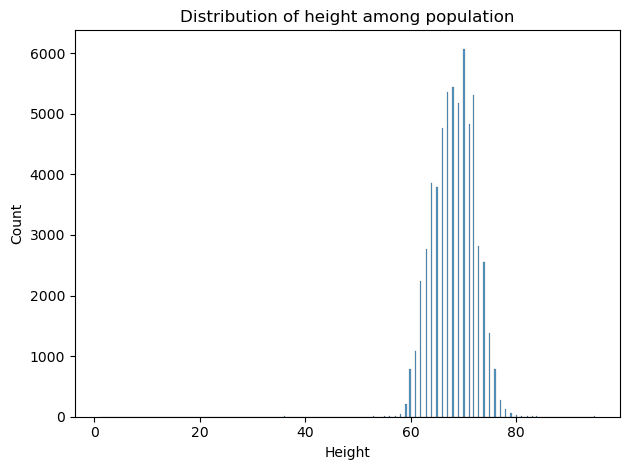

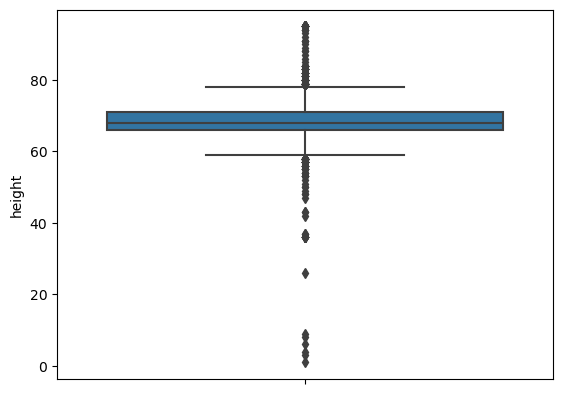

In [17]:
sns.histplot(data=profiles, x='height')
plt.xlabel('Height')
plt.title('Distribution of height among population')
plt.axis()
plt.tight_layout()
plt.show()

plt.clf()
sns.boxplot(data=profiles, y='height')
plt.show()


#### 04.3 - Distribution and proportion of all different sexual orientations


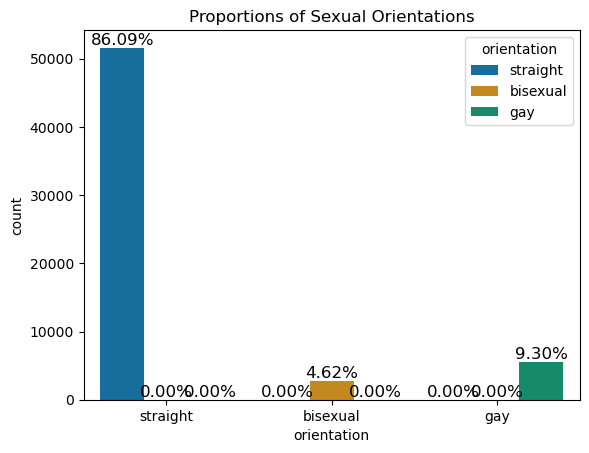

In [18]:
#plotting the countplot for sexual orientation
ax = sns.countplot(x='orientation', data=profiles, palette='colorblind', hue='orientation')
total = profiles['orientation'].count()

for p in ax.patches:
    height = p.get_height()
    proportion = height / total 
    ax.text(p.get_x() + p.get_width() / 2, height + 50,  
            f'{proportion:.2%}',  
            ha='center', va='bottom', fontsize=12)

plt.title('Proportions of Sexual Orientations')
plt.show()

#### 04.4 - Relationship between ethnicity and income

In [19]:
#From previous dataset info, it is known that ethnicity has missing values

#how many missing values?

print(profiles['ethnicity'].isna().value_counts())

#Is ethnicity missing more often for certain age groups, gender, orientation, or essay length?
print(profiles['ethnicity'].isna().groupby(profiles['age']).mean())
print(profiles['ethnicity'].isna().groupby(profiles['orientation']).mean())
print(profiles['ethnicity'].isna().groupby(profiles['religion']).mean())
print(profiles['ethnicity'].isna().groupby(profiles['sex']).mean())
print(profiles['ethnicity'].isna().groupby(profiles['income']).mean())

ethnicity
False    54266
True      5680
Name: count, dtype: int64
age
18     0.100324
19     0.101473
20     0.089192
21     0.095944
22     0.088935
23     0.107639
24     0.089759
25     0.099122
26     0.096402
27     0.108277
28     0.107452
29     0.105615
30     0.109876
31     0.102742
32     0.107074
33     0.102901
34     0.097792
35     0.095157
36     0.073910
37     0.092502
38     0.083459
39     0.091297
40     0.080583
41     0.075510
42     0.091418
43     0.081585
44     0.093220
45     0.065319
46     0.070934
47     0.094518
48     0.056133
49     0.061002
50     0.059497
51     0.062857
52     0.069767
53     0.107143
54     0.044944
55     0.094340
56     0.062731
57     0.050781
58     0.050761
59     0.076923
60     0.076923
61     0.056818
62     0.047904
63     0.050725
64     0.079646
65     0.064220
66     0.057143
67     0.060606
68     0.000000
69     0.161290
109    1.000000
110    1.000000
Name: ethnicity, dtype: float64
orientation
bisexual    0.133357
g

In [20]:
#From proportions above, we can assume MCAR, since there's no clear reason why the data is missing and all proportions are roughly equal.

#Every missing value will be replaced with 'unknown'

#new dataset that only contains ethnicity and income
eth_inc_filtered = profiles[['ethnicity', 'income']]

#filling NaN with 'unknown'
eth_inc_filtered = eth_inc_filtered.fillna(value={'ethnicity': 'unknown'})

#plotting the proportions of ethnicities
#getting unique values of ethnicities
print(eth_inc_filtered['ethnicity'].value_counts())

#There are 218 possible values for ethnicity, let's keep a maximum of 2 mixes to simplify the dataset (i.e black, white)
eth_inc_filtered['simple_ethnicity'] = eth_inc_filtered['ethnicity'].apply(
    lambda x: 1 if isinstance(x, str) and x.count(',') <= 1 else 0
)

#updating the ethnicities with more than two mixes with the word 'mixed ethnicity'
eth_inc_filtered['ethnicity'] = eth_inc_filtered.apply(lambda x: x['ethnicity'] if x['simple_ethnicity'] == 1
                                                                    else "mixed ethnicity", axis=1)




ethnicity
white                                                                 32831
asian                                                                  6134
unknown                                                                5680
hispanic / latin                                                       2823
black                                                                  2008
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 218, dtype: int64


In [21]:
#new dataset with a column with an indicator: 1 if simple ethnicity or maximum two mixed. The rest are zero
print(eth_inc_filtered.head(20))
print(len(eth_inc_filtered['ethnicity'].value_counts()))

##Exporting these values to use it later in another notebook

eth_inc_filtered[['ethnicity']].to_csv('ethnicity_base.csv', index=False)


                  ethnicity  income  simple_ethnicity
0              asian, white      -1                 1
1                     white   80000                 1
2                   unknown      -1                 1
3                     white   20000                 1
4           mixed ethnicity      -1                 0
5                     white      -1                 1
6              white, other      -1                 1
7                     white      -1                 1
8                     white      -1                 1
9                     white      -1                 1
10                    white      -1                 1
11                    white   40000                 1
12                    white      -1                 1
13                    white   30000                 1
14  hispanic / latin, white   50000                 1
15                    white      -1                 1
16                    white      -1                 1
17         hispanic / latin 

In [22]:
print(len(eth_inc_filtered))
print(np.sum(eth_inc_filtered['income'] == -1))

#Since there are 48.442 missing values for income, the only option is to drop them all, or imputation. 
# With 81% missing, imputation is likely to introduce bias or noise

59946
48442


Conclusion on Q4: With 81% missing for the income feature, imputation is likely to introduce bias or noise, the best practice would be to drop the variable

#### 04.5 - Relationship between orientation and religion

In [23]:
#new dataset that only contains orientation and religion
ort_relg_filtered = profiles[['orientation', 'religion']]

#value counts for religion to check the nature of missing values
print(ort_relg_filtered['religion'].value_counts())
print(len(ort_relg_filtered['religion'].value_counts()))

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

In [24]:
#There are 45 categories in religion, how many missing values?
print(f"Number of missing values for religion: {np.sum(ort_relg_filtered['religion'].isna())}")

Number of missing values for religion: 20226


In [25]:
#Grouping by religion base with regex, regardless the level of strictness about it
ort_relg_filtered['religion_base'] = ort_relg_filtered['religion'].str.extract(r'^(\w+)')

C:\Users\ntama\AppData\Local\Temp\ipykernel_31200\757562915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ort_relg_filtered['religion_base'] = ort_relg_filtered['religion'].str.extract(r'^(\w+)')


In [26]:
#contingency table of frequencies (observed)
freq_ort_relg = pd.crosstab(ort_relg_filtered['religion_base'], ort_relg_filtered['orientation'])
print(freq_ort_relg)

orientation    bisexual  gay  straight
religion_base                         
agnosticism         445  782      7585
atheism             510  663      5812
buddhism            134  275      1539
catholicism          79  415      4264
christianity        140  393      5254
hinduism              9   26       415
islam                 5    9       125
judaism             129  232      2737
other               620  828      6295


In [27]:
#contingency table with proportions (observed)
props_ort_relg = freq_ort_relg/len(ort_relg_filtered)
print(props_ort_relg)

orientation    bisexual       gay  straight
religion_base                              
agnosticism    0.007423  0.013045  0.126531
atheism        0.008508  0.011060  0.096954
buddhism       0.002235  0.004587  0.025673
catholicism    0.001318  0.006923  0.071131
christianity   0.002335  0.006556  0.087646
hinduism       0.000150  0.000434  0.006923
islam          0.000083  0.000150  0.002085
judaism        0.002152  0.003870  0.045658
other          0.010343  0.013812  0.105011


In [28]:
#Marginal proportions 
religion_marginals = props_ort_relg.sum(axis=1)
orientation_marginals = props_ort_relg.sum(axis=0)
print(religion_marginals)
print(orientation_marginals)

religion_base
agnosticism     0.146999
atheism         0.116522
buddhism        0.032496
catholicism     0.079371
christianity    0.096537
hinduism        0.007507
islam           0.002319
judaism         0.051680
other           0.129166
dtype: float64
orientation
bisexual    0.034548
gay         0.060438
straight    0.567611
dtype: float64


In [29]:
#Expected contingency table with proportions
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(freq_ort_relg)
print(pval)
print(expected)

4.3420009116351463e-116
[[4.59457503e+02 8.03773313e+02 7.54876918e+03]
 [3.64197759e+02 6.37126259e+02 5.98367598e+03]
 [1.01568681e+02 1.77683887e+02 1.66874743e+03]
 [2.48082024e+02 4.33993807e+02 4.07592417e+03]
 [3.01734063e+02 5.27852492e+02 4.95741344e+03]
 [2.34629909e+01 4.10460725e+01 3.85490937e+02]
 [7.24745720e+00 1.26786757e+01 1.19073867e+02]
 [1.61529658e+02 2.82579406e+02 2.65389094e+03]
 [4.03719864e+02 7.06266088e+02 6.63301405e+03]]


Conclusion on Q5: Since p-value is significantly inferior to 0,05 and observed and expected frequencies are significantly different, there is likely a statistically significant association between religion and orientation.

---
##### EDA Continued: Correlation between age and income.


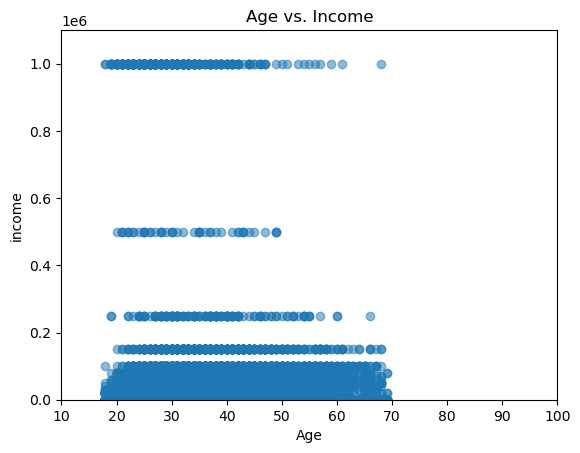

The correlation coefficient between age and income is: -0.001003839875436117


In [30]:
plt.scatter(data=profiles, x='age', y='income', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('income')
plt.title('Age vs. Income')
plt.axis([10, 100, 0, 1100000])
plt.show()

#getting the correlation coefficient
from scipy.stats import pearsonr
corr_age_income, p = pearsonr(profiles['age'], profiles['income'])
print(f"The correlation coefficient between age and income is: {corr_age_income}")

There is no clear correlation between age and income in this dataset

#### 04.6 - Correlation between numerical variables


##### Pairplots for all numerical variables

c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ntama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x800 with 0 Axes>

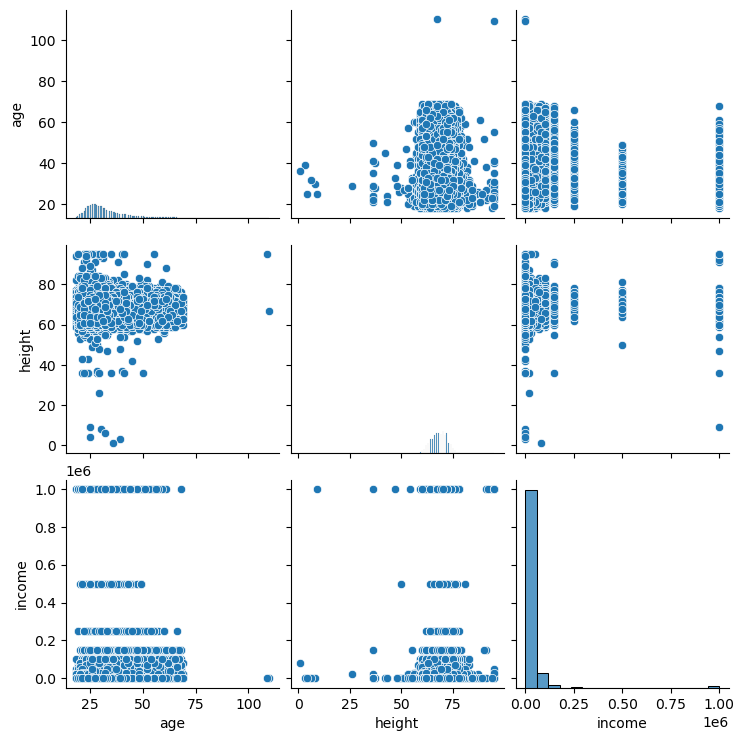

In [31]:
plt.figure(figsize=(12,8))
sns.pairplot(profiles)
plt.show()


##### Pearson's correlation coefficients for all numerical variables:

In [32]:
corr_matr = profiles.corr(numeric_only=True)
corr_matr

,age,height,income
age,1.000000,-0.022261,-0.001004
height,-0.022261,1.000000,0.065049
income,-0.001004,0.065049,1.000000


No direct correlation between numerical variables is observed

In [33]:
profiles['income'].value_counts(1)

income
-1          0.808094
 20000      0.049244
 100000     0.027041
 80000      0.018533
 30000      0.017482
 40000      0.016765
 50000      0.016265
 60000      0.012278
 70000      0.011794
 150000     0.010526
 1000000    0.008691
 250000     0.002486
 500000     0.000801
Name: proportion, dtype: float64

Feature *'income'* has 81% missing values or reported as "-1". imputation is likely to introduce noise. 

In [34]:
print(profiles['height'].value_counts(0))

height
70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
        ... 
3.0        1
8.0        1
93.0       1
52.0       1
4.0        1
Name: count, Length: 61, dtype: int64


In [35]:
#replacing 3 missing values on the feature 'height' with the mean
profiles['height'] = profiles['height'].fillna(profiles['height'].mean)

In [36]:
print(profiles['height'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 59946 entries, 0 to 59945
Series name: height
Non-Null Count  Dtype  
--------------  -----  
59946 non-null  float64
dtypes: float64(1)
memory usage: 468.5 KB
None


In [37]:
#turning categorical variables into a list
categ_var = list((profiles.select_dtypes(include=object)))

#checking missing values after tidying and processing the data
np.sum(profiles[categ_var].isna())

print(categ_var)
print(profiles[categ_var].dtypes)


['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
body_type      object
diet           object
drinks         object
drugs          object
education      object
ethnicity      object
job            object
last_online    object
location       object
offspring      object
orientation    object
pets           object
religion       object
sex            object
sign           object
smokes         object
speaks         object
status         object
dtype: object


c:\Users\ntama\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Checking three values for categorical correlation: Chi2, p-value, Cramer's V

In [38]:
#Cramer's V function
def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

In [39]:
#looping for p-value and chi2 
#for var_a, var_b in combinations(categ_var, 2):
   # table = pd.crosstab(profiles[var_a], profiles[var_b])
    #chi2, p, dof, expected = chi2_contingency(table)
    #if cramers_v(table) >= 0.4:
        #print(f"{var_a} vs {var_b}: Chi² = {chi2:.2f}, p = {p:.6f}, Cramer's V = {cramers_v(table)}")


Conclusion: Categorical variables have very weak associations except for dogs vs cats (as expected)

In [40]:
print(profiles.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education            ethnicity  height  income  \
0      working on college/university         asian, white    75.0      -1   
1              working on space camp                white    70.0   80000   
2     graduated from masters program                  NaN    68.0      -1   
3      working on college/university                white    71.0   20000   
4  graduated from college/university  asian, black, other    66.0      -1   

                           job  ...                         location  \
0               transportation  ...  south san francisco, california

#### 04.8 - Exporting EDA's dataset

In [41]:
profiles.to_csv('profiles_eda.csv')

In [42]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
